<a href="https://colab.research.google.com/github/jazthescientist/COVIDRecoveryRate2020/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries and download
import kagglehub
import pandas as pd
import os
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

# daywise.csv in directory
dataset_file = None
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            dataset_file = os.path.join(root, file)
            break

# dataset load, 188 rows and 12 columns
if dataset_file:
    df = pd.read_csv(dataset_file)
    row_count, column_count = df.shape
    print(f"Number of rows: {row_count}, Number of columns: {column_count}")
else:
    print("No CSV file found in the dataset")

# row and column names
if dataset_file:
    df = pd.read_csv(dataset_file)
    print("Columns:", df.columns.tolist())
    print("Index (Rows):", df.index.tolist()[:10])  # Display first 10 rows
else:
    print("No CSV file found in the dataset")


    print(df.columns)


Number of rows: 188, Number of columns: 12
Columns: ['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries']
Index (Rows): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


The data set I chose includes information about confirmed COVID19 cases, deaths, recoveries, and other similar metrics. Using the specific csv related to a day by day comparison of cases with deaths and recoveries I want to ask the question: "How did the ratio of reocveries to confirmed cases change over time?"

In [ ]:
# cleaning data

# missing cells? filled with 0 (since they represent counts)
df.fillna(0, inplace=True)

# verify no more missing
print("Missing values in each column after filling with 0:\n", df.isnull().sum())

# formatting check
# confirm date is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# conversion error check for NaTs
invalid_dates = df['Date'].isnull().sum()
print(f"Invalid date values: {invalid_dates}")
df = df.dropna(subset=['Date'])

# check numeric columns for nonnumeric values and convert
numeric_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases']
optional_columns = ['New deaths', 'New recovered']

# Convert required numeric columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert optional columns if they exist
for col in optional_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# fill NaN values with 0 for numeric columns after conversion
existing_columns = [col for col in numeric_columns + optional_columns if col in df.columns]
df[existing_columns] = df[existing_columns].fillna(0)

# duplicate removal
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()

# unrealisitic value removal (like negs)
for col in existing_columns:
    df = df[df[col] >= 0]

# gen clean
# rename columns for reference
df.rename(columns={'Deaths / 100 Cases': 'Deaths_Per_100_Cases', 'Recovered / 100 Cases': 'Recovered_Per_100_Cases'}, inplace=True)

# dropping columns that are not needed for my question
columns_to_drop = ['New deaths', 'New recovered', 'Deaths / 100 Recovered']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


Missing values in each column after filling with 0:
 Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64
Invalid date values: 0
Number of duplicate rows: 0


In [ ]:
# calculations

# 1. calculate the average recovery rate
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed']) * 100
average_recovery_rate = df['Recovery_Rate'].mean()
print(f"Average Recovery Rate: {average_recovery_rate:.2f}%")

# 34.34%

# 2. calculate the total number of deaths
total_deaths = df['Deaths'].sum()
print(f"Total Number of Deaths: {total_deaths}")

# 43384903

# 3. calculate the median number of active cases
median_active_cases = df['Active'].median()
print(f"Median Number of Active Cases: {median_active_cases}")

#1859759.0


Average Recovery Rate: 34.34%
Total Number of Deaths: 43384903
Median Number of Active Cases: 1859759.0


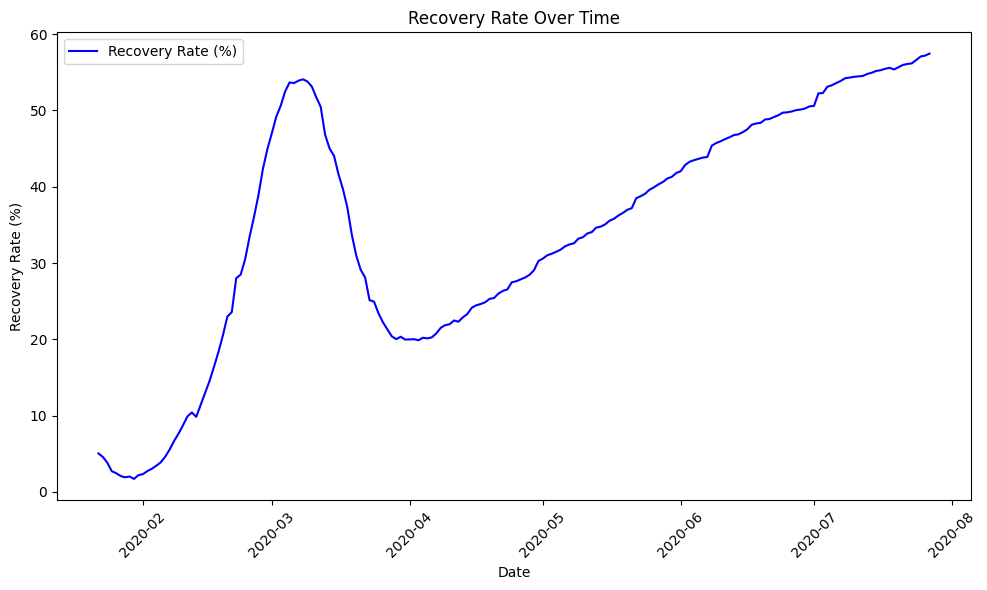

In [ ]:
# data visualization

# line chart showing the recovery rate (recovered/confirmed) over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Recovery_Rate'], label='Recovery Rate (%)', color='b')
plt.xlabel('Date')
plt.ylabel('Recovery Rate (%)')
plt.title('Recovery Rate Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
